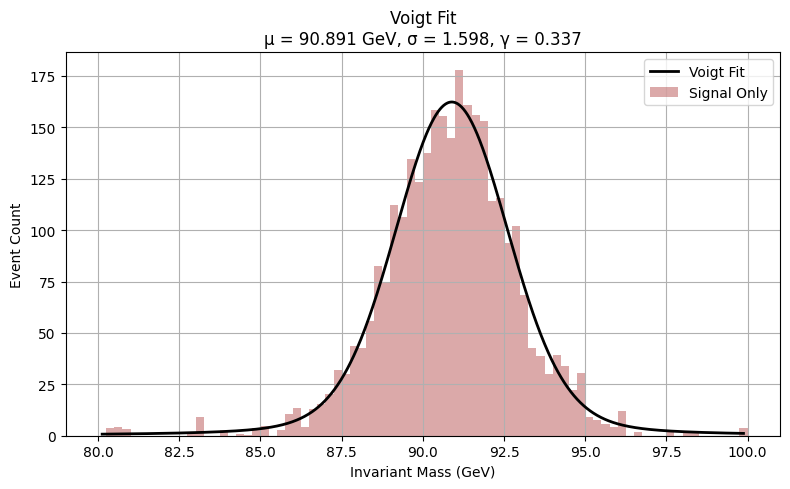

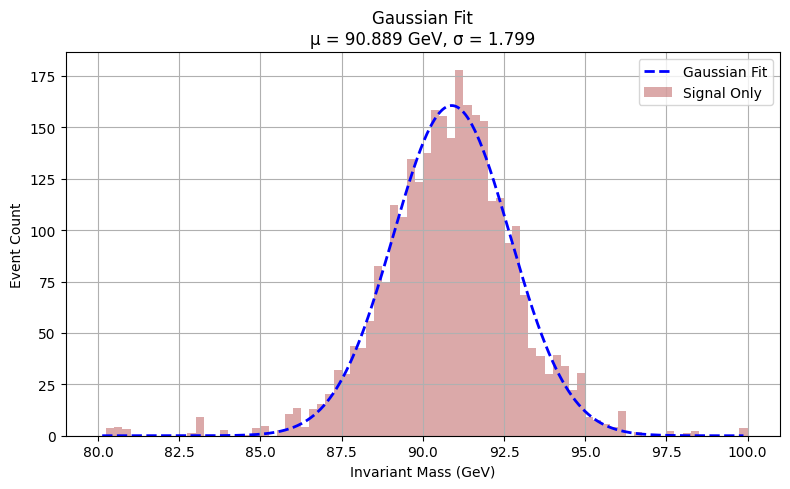

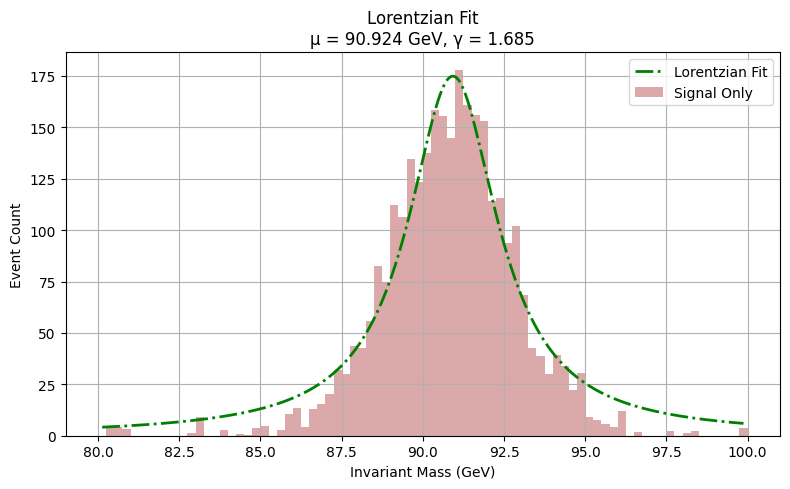

📊 Total signal-only events considered in fit: 2976
✅ Fit Parameter Summary:
Voigt → μ = 90.891, σ = 1.598, γ = 0.337
Gaussian → μ = 90.889, σ = 1.799
Lorentzian → μ = 90.924, γ = 1.685


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import wofz

# --- 1. Load Histogram Data (Background Subtracted) ---
hist_df = pd.read_csv('/Users/xDAyN/Desktop/cs project/School Project/Numerical Analysis/zboson_background_subtracted_histogram.csv')
bin_centers = hist_df['bin_center'].values
signal_only = hist_df['signal_only'].values

# --- 2. Define Fit Functions ---
def voigt(x, amp, center, sigma, gamma):
    z = ((x - center) + 1j * gamma) / (sigma * np.sqrt(2))
    return amp * np.real(wofz(z)) / (sigma * np.sqrt(2 * np.pi))

def gaussian(x, amp, mean, sigma):
    return amp * np.exp(-(x - mean)**2 / (2 * sigma**2))

def lorentzian(x, amp, x0, gamma):
    return amp * gamma**2 / ((x - x0)**2 + gamma**2)

# --- 3. Fit All Models ---
# Voigt
popt_voigt, _ = curve_fit(
    voigt,
    bin_centers,
    signal_only,
    p0=[100, 91.2, 2.5, 2.5],
    bounds=([0, 88, 0.1, 0.1], [np.inf, 94, 10, 10]),
    maxfev=10000
)

# Gaussian
popt_gauss, _ = curve_fit(
    gaussian,
    bin_centers,
    signal_only,
    p0=[100, 91.2, 2.5]
)

# Lorentzian
popt_lorentz, _ = curve_fit(
    lorentzian,
    bin_centers,
    signal_only,
    p0=[100, 91.2, 2.5]
)

x_fit = np.linspace(bin_centers.min(), bin_centers.max(), 1000)
y_voigt = voigt(x_fit, *popt_voigt)
y_gauss = gaussian(x_fit, *popt_gauss)
y_lorentz = lorentzian(x_fit, *popt_lorentz)

# --- 4. Plot: Voigt Fit ---
plt.figure(figsize=(8, 5))
plt.bar(bin_centers, signal_only, width=bin_centers[1] - bin_centers[0], alpha=0.4, color='brown', label='Signal Only')
plt.plot(x_fit, y_voigt, 'k-', linewidth=2, label='Voigt Fit')
plt.title(f'Voigt Fit\nμ = {popt_voigt[1]:.3f} GeV, σ = {popt_voigt[2]:.3f}, γ = {popt_voigt[3]:.3f}')
plt.xlabel('Invariant Mass (GeV)')
plt.ylabel('Event Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 5. Plot: Gaussian Fit ---
plt.figure(figsize=(8, 5))
plt.bar(bin_centers, signal_only, width=bin_centers[1] - bin_centers[0], alpha=0.4, color='brown', label='Signal Only')
plt.plot(x_fit, y_gauss, 'b--', linewidth=2, label='Gaussian Fit')
plt.title(f'Gaussian Fit\nμ = {popt_gauss[1]:.3f} GeV, σ = {popt_gauss[2]:.3f}')
plt.xlabel('Invariant Mass (GeV)')
plt.ylabel('Event Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 6. Plot: Lorentzian Fit ---
plt.figure(figsize=(8, 5))
plt.bar(bin_centers, signal_only, width=bin_centers[1] - bin_centers[0], alpha=0.4, color='brown', label='Signal Only')
plt.plot(x_fit, y_lorentz, 'g-.', linewidth=2, label='Lorentzian Fit')
plt.title(f'Lorentzian Fit\nμ = {popt_lorentz[1]:.3f} GeV, γ = {popt_lorentz[2]:.3f}')
plt.xlabel('Invariant Mass (GeV)')
plt.ylabel('Event Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 7. Print Summary ---
print(f"📊 Total signal-only events considered in fit: {np.sum(signal_only):.0f}")
print("✅ Fit Parameter Summary:")
print(f"Voigt → μ = {popt_voigt[1]:.3f}, σ = {popt_voigt[2]:.3f}, γ = {popt_voigt[3]:.3f}")
print(f"Gaussian → μ = {popt_gauss[1]:.3f}, σ = {popt_gauss[2]:.3f}")
print(f"Lorentzian → μ = {popt_lorentz[1]:.3f}, γ = {popt_lorentz[2]:.3f}")

